In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_AWS = pd.read_csv("AWS-SaaS-Sales.csv")
df_ecom = pd.read_csv("e-commerce-customer_journey.csv")
df_pipeline = pd.read_csv("Sales_Pipeline_SaaS_Startup.csv")

In [9]:
print("AWS: " + str(len(df_AWS)))
print("E-com: " + str(len(df_ecom)))
print("Pipe: " + str(len(df_pipeline)))

AWS: 9994
E-com: 12719
Pipe: 78025


In [16]:
print("AWS cols: " + str(len(df_AWS.columns)))
print("Ecom cols: " + str(len(df_ecom.columns)))
print("Pipe cols: " + str(len(df_pipeline.columns)))

AWS cols: 19
Ecom cols: 10
Pipe cols: 13


In [ ]:
def plot_all_dataframe_columns(df):
    """
    Generates histograms for numeric columns and bar charts for categorical
    columns in a pandas DataFrame.
    """

    # --- Part 1: Plot Histograms for Numeric Columns ---

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=np.number)

    if not numeric_df.empty:
        print(f"Plotting histograms for {len(numeric_df.columns)} numeric columns...")

        # Determine the grid size for subplots
        num_plots = len(numeric_df.columns)

        # Let's fix columns at 3 for a nice layout
        plot_ncols = 3
        if num_plots < plot_ncols:
            plot_ncols = num_plots

        plot_nrows = int(np.ceil(num_plots / plot_ncols))

        # This call creates its own figure and axes grid
        axes_list = numeric_df.hist(bins=20,
                                    layout=(plot_nrows, plot_ncols),
                                    grid=False,
                                    figsize=(plot_ncols * 5, plot_nrows * 4))

        # Get the figure object from the returned axes list to set title
        fig = None
        if isinstance(axes_list, plt.Axes):
            # Single plot case
            fig = axes_list.get_figure()
        elif isinstance(axes_list, np.ndarray) and axes_list.size > 0:
            # Multiple plots case
            # Flatten and get the first axes to find the figure
            first_ax = axes_list.flatten()[0]
            if first_ax:
                fig = first_ax.get_figure()

        if fig:
            # Set a main title
            fig.suptitle("Histograms for Numeric Columns", fontsize=16, y=1.02)
            plt.tight_layout()
            plt.show()
        else:
            print("Could not retrieve figure to set title.")
    else:
        print("No numeric columns found.")

    # --- Part 2: Plot Bar Charts for Categorical Columns ---

    # Select categorical/object columns
    categorical_df = df.select_dtypes(include=['object', 'category'])

    if not categorical_df.empty:
        print(f"\nPlotting bar charts for {len(categorical_df.columns)} categorical columns...")

        # Determine grid size
        num_plots = len(categorical_df.columns)
        plot_ncols = 3
        if num_plots < plot_ncols:
            plot_ncols = num_plots

        plot_nrows = int(np.ceil(num_plots / plot_ncols))

        fig, axes = plt.subplots(nrows=plot_nrows, ncols=plot_ncols, figsize=(plot_ncols * 5, plot_nrows * 4))

        # Flatten the axes array
        if isinstance(axes, plt.Axes):
            axes_flat = np.array([axes])
        else:
            axes_flat = axes.flatten()

        # Iterate through columns and plot
        for i, col in enumerate(categorical_df.columns):
            ax = axes_flat[i]
            # Get value counts and plot as a bar chart
            value_counts = df[col].value_counts()

            # Limit to top 20 most frequent for readability
            if len(value_counts) > 20:
                value_counts = value_counts.nlargest(20)
                ax.set_title(f"{col}\n(Top 20 categories)")
            else:
                ax.set_title(f"{col}")

            value_counts.plot(kind='bar', ax=ax)
            ax.set_ylabel("Count")
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            # Rotate labels for readability
            ax.tick_params(axis='x', rotation=90)

        # Turn off any unused subplots
        for i in range(num_plots, len(axes_flat)):
            axes_flat[i].axis('off')

        fig.suptitle("Bar Charts for Categorical Columns", fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

    else:
        print("No categorical columns found.")

In [ ]:
print("Total Profit: " + df_AWS["Profit"].sum())

286397.0217


In [40]:
print(df_AWS.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')


In [36]:
print(str(df_AWS["Date Key"].min()) + " - " + str(df_AWS["Date Key"].max()))

20200104 - 20231231


In [39]:
df_pipeline.head(20)

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K
5,N00000006,Technical Business Solutions,Delhi,Enterprise Sellers,89,Loss,3,42501,More than 1M,1K or less,0 (No business),Unknown,40K to 50K
6,N00000007,ERP Implementation,Delhi,Marketing,111,Won,12,12208,500K to 1M,More than 25K,0 (No business),Unknown,10K to 20K
7,N00000008,ERP Implementation,Delhi,Marketing,82,Loss,6,54776,100K or less,1K or less,0 (No business),Known,50K to 60K
8,N00000009,ERP Implementation,Bengaluru,Marketing,68,Loss,8,59129,100K or less,More than 25K,0 (No business),NaN,50K to 60K
9,N00000010,ERP Implementation,Delhi,Enterprise Sellers,18,Loss,7,38406,100K or less,1K or less,0 (No business),Unknown,30K to 40K


Plotting histograms for 7 numeric columns...


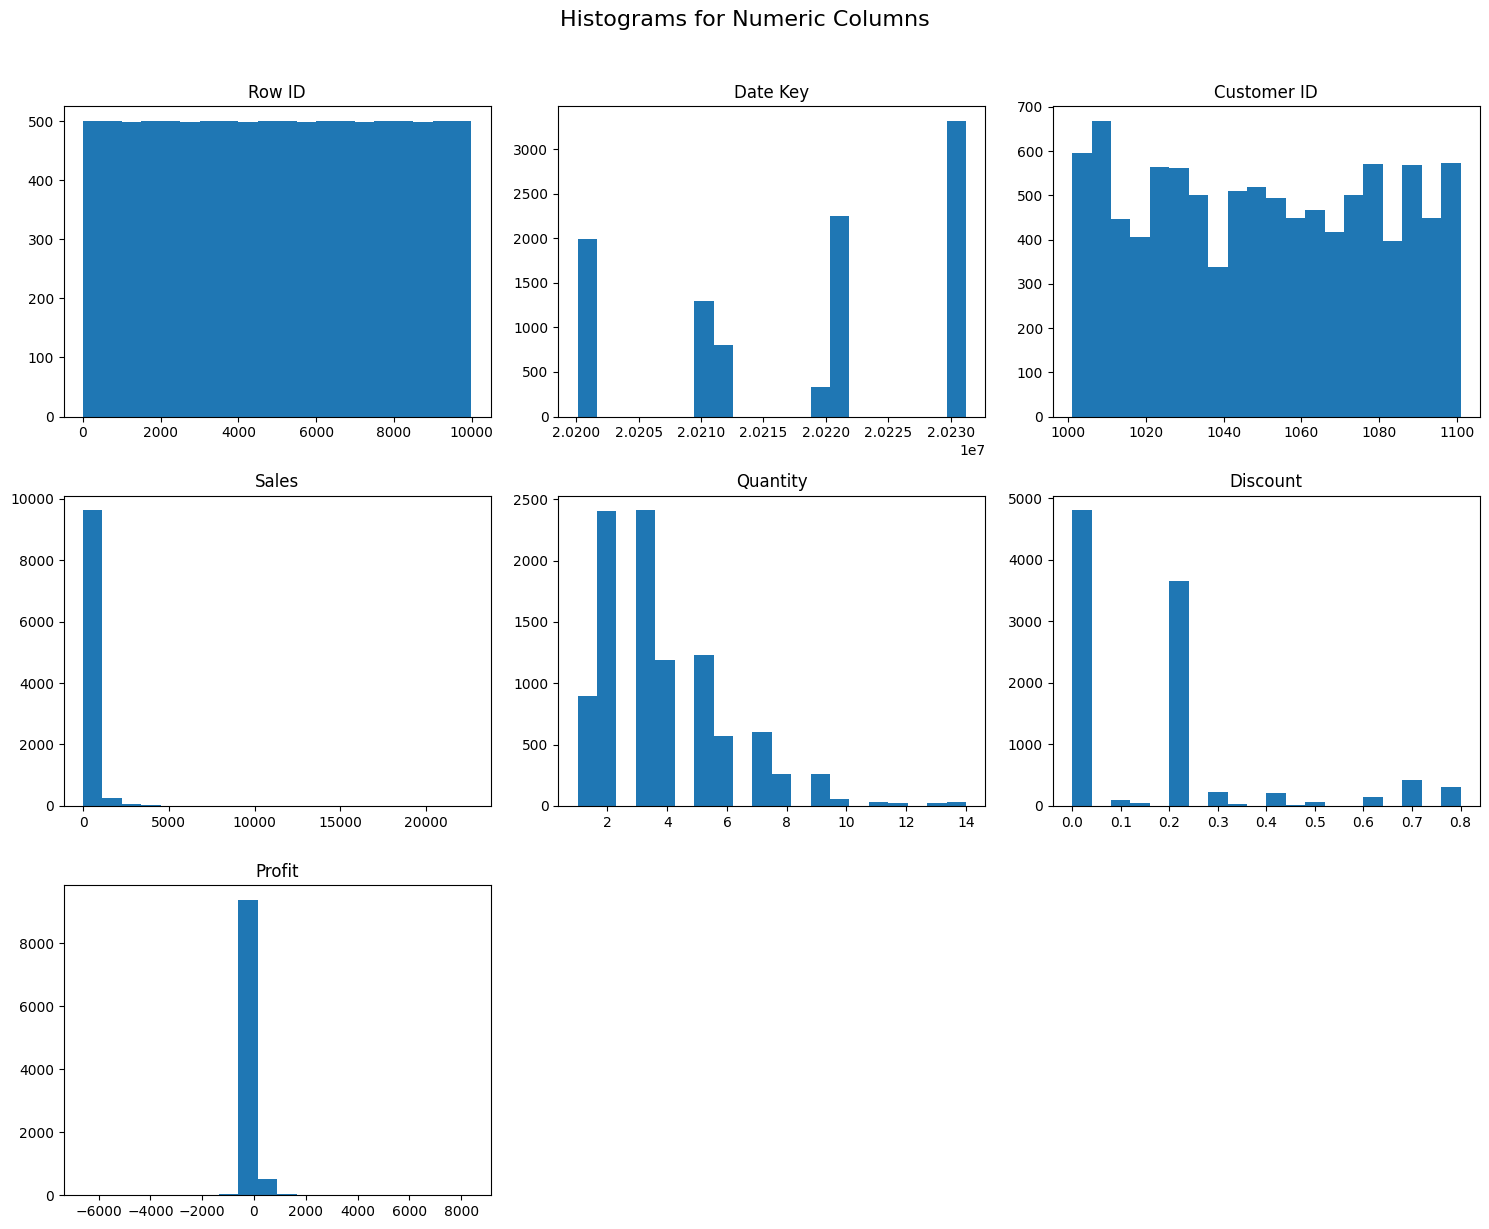


Plotting bar charts for 12 categorical columns...


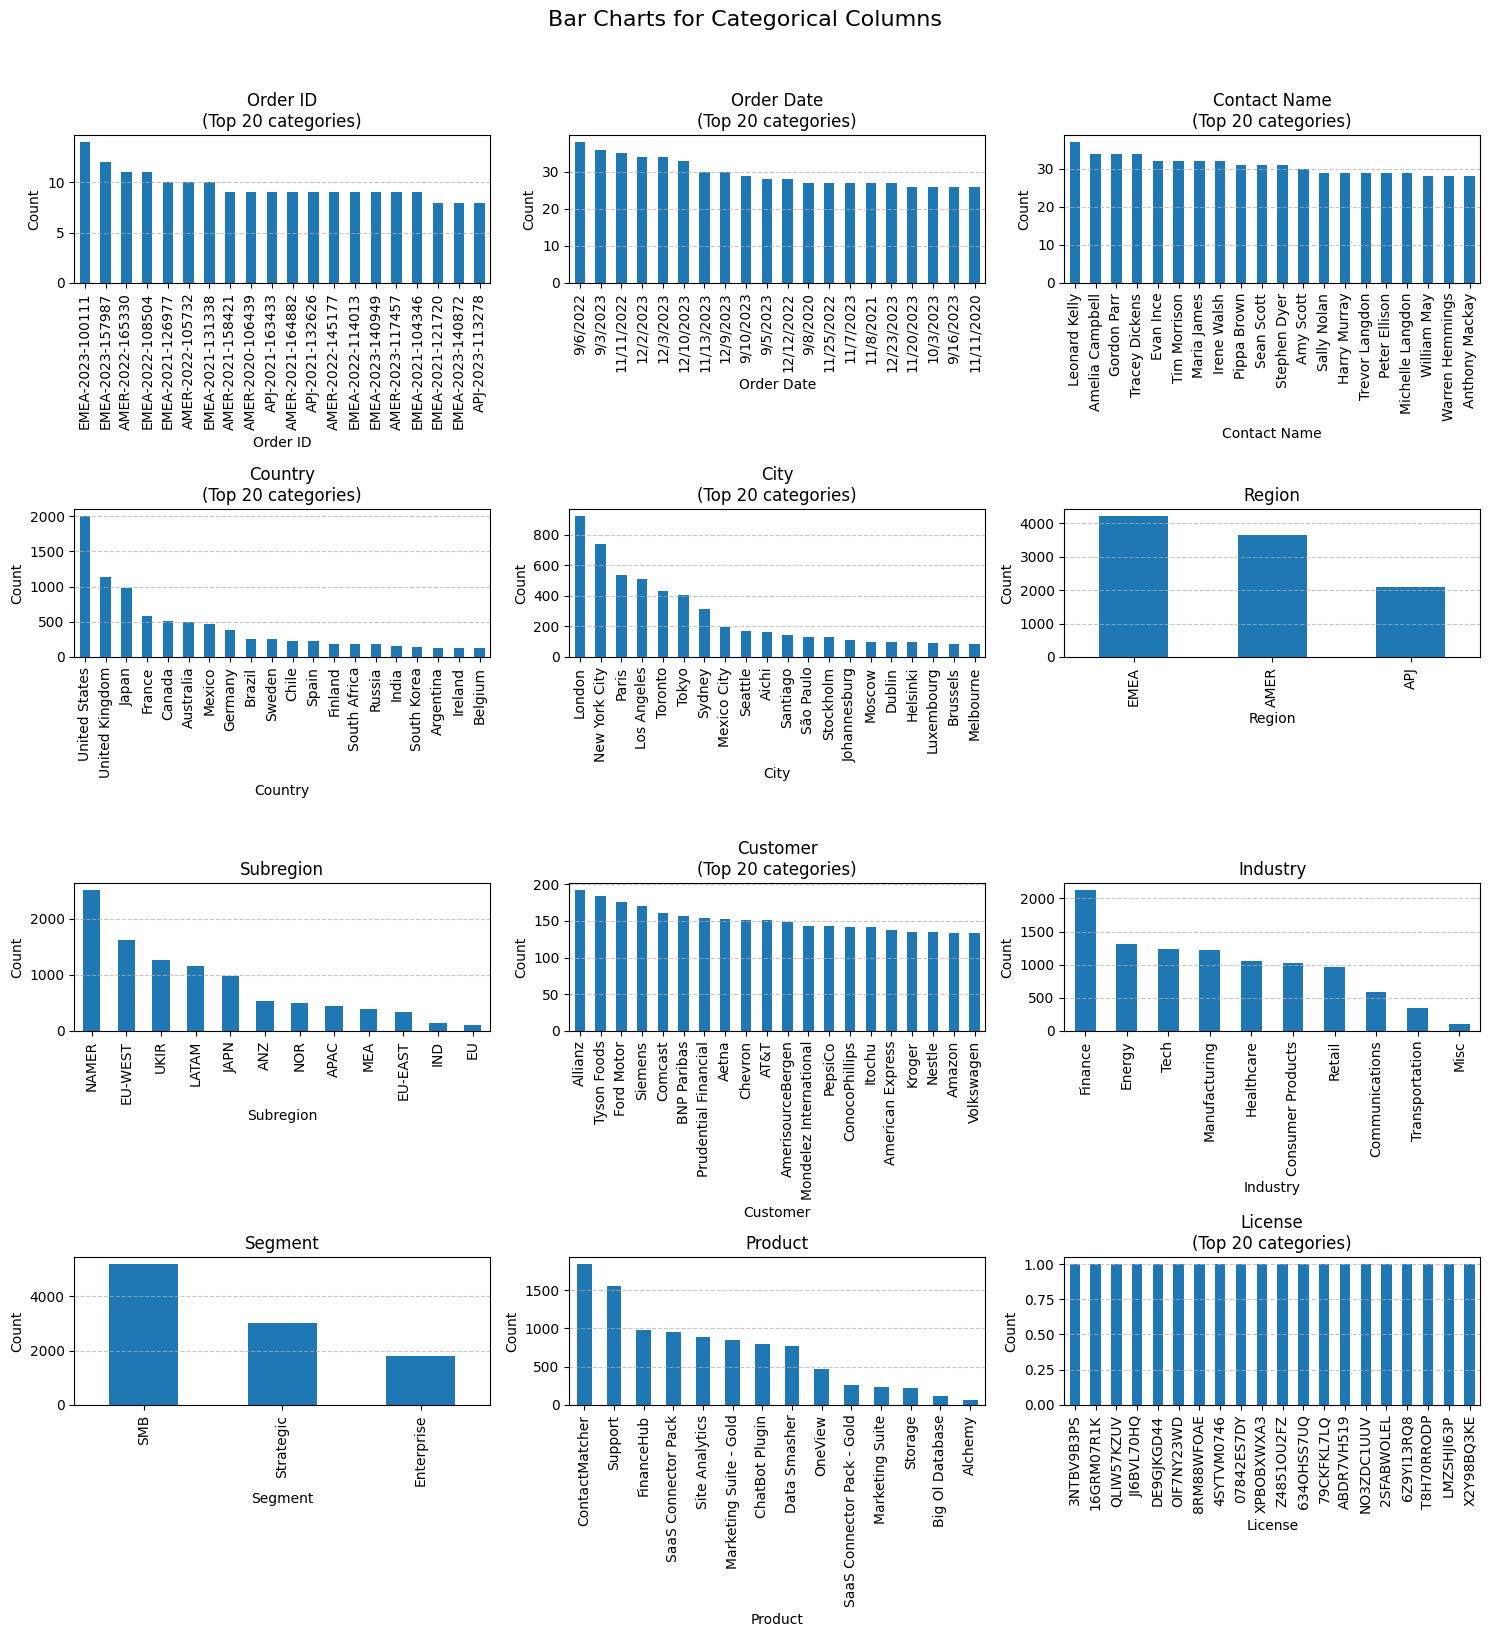

In [27]:
plot_all_dataframe_columns(df_AWS)